Here we consider the calculation of the spectrum of a chain of 8 qubits

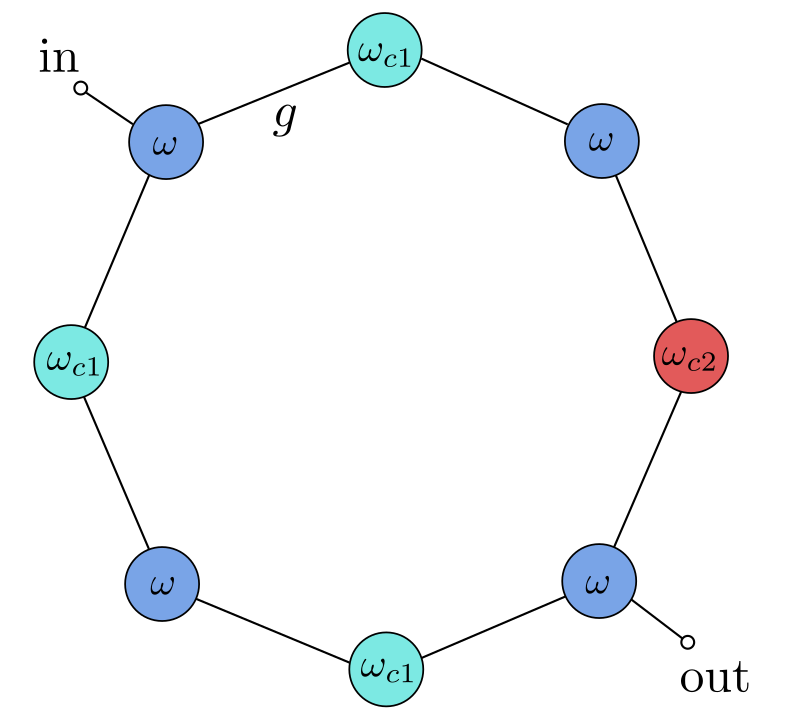

with following hamiltonian (N = 8)

\begin{equation}
\hat{H}=\sum_{i=1}^N \omega_i{\hat{a_i}}^{\dagger} \hat{a_i} + g_1 \sum_{i=1}^N{\hat{a_{i+1}}}^{\dagger} \hat{a_i}+g_2{\hat{a_N}}^{\dagger} \hat{a}_{\hat{N-1}}+g_2{\hat{a_1}}^{\dagger} \hat{a_N}+\text { h.c. }
\end{equation}

In [12]:
from math import pi
import numpy as np
from qutip import steadystate, expect, Qobj
import matplotlib.pyplot as plt

import sys
import path
import os
 
sys.path.append(os.path.dirname(os.getcwd()))

from main import QSystem

In [13]:
# let's investigate 8q system
# below you can find required constants
w = 6.5 * 2 * pi  # frequencies of qubits, GHz
wc_pos = 6 * 2 * pi
wc_neg = 7 * 2 * pi
g = 80e-3 * 2 * pi  # coupling coefficient, GHz
gamma = 16e-3  # decay rates, GHz
Gamma = gamma

In [14]:
frequencies = [[0, w], [1, wc_pos], [2, w], [3, wc_pos], [4, w], [5, wc_pos], [6, w], [7, wc_neg]]
couplings = [[1, 0, g], [2, 1, g], [3, 2, g], [4, 3, g], [5, 4, g], [6, 5, g], [7, 6, g], [0, 7, g]]
n_q = len(frequencies)
single_photon_states = [[0 for _ in range(n_q)], ] + [[1 if j == i else 0 for j in range(n_q)] for i in
                                                      range(n_q)]  # basis states
system = QSystem(frequencies, couplings, single_photon_states)  # initialization of the system

In [15]:
# In the next block, we will compute transmission spectre of the system using qutip.steadystate
drive_frequencies = np.linspace(6.469, 6.568, 1000) * 2 * pi
drive_amplitude = 0.1e-2 * 2 * pi
sparam = []
for w_drive in drive_frequencies:
    H_full = system.H_matrix() + Qobj(
        np.array([[-w_drive if (i == j and i != 0) else 0 for j in range(len(single_photon_states))] for i in
                  range(len(single_photon_states))])) + drive_amplitude / 2 * (
                     system.annihilation_operator_matrix(0) + system.annihilation_operator_matrix(0).dag())
    final_state = steadystate(H_full, [np.sqrt(gamma) * system.annihilation_operator_matrix(0),
                                       np.sqrt(gamma) * system.annihilation_operator_matrix(4)],
                              use_precond=True, maxiter=1000, tol=1e-12,
                              return_info=True)
    s = 2 * Gamma / (1j * drive_amplitude) * expect(Qobj(system.annihilation_operator_matrix(4)).dag(), final_state[0])
    sparam.append(s)


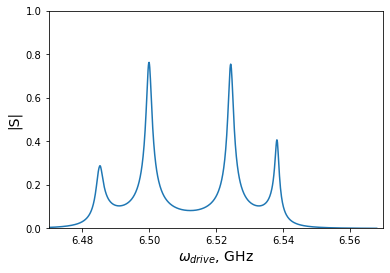

In [16]:
# visualization block
plt.plot(drive_frequencies / (2 * pi), np.abs(np.array(sparam)))
plt.xlabel("$\omega_{drive}$, GHz", fontsize=14)
plt.ylabel("|S|", fontsize=14)
plt.axis([6.47, 6.57, 0, 1.0])
plt.show()
